In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

We are now going to take on the Titanic dataset, and predict wheter a given passanger will survive or not - given a few features.

Make sure to read about the dataset [here.](https://www.kaggle.com/c/titanic/data)

In [2]:
# load the titanic dataset

titanic_df = pd.read_csv('titanic.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
import seaborn as sns

In [4]:
titanic_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [5]:
titanic_df[titanic_df.Sex == 'male']['Survived'].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [6]:
titanic_df[titanic_df.Sex == 'female']['Survived'].value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

In [7]:
titanic_df.Sex.isnull().sum()

0

---

## Challenges

**Task 1**

Read the documentation of the dataset, and think carefully about the features available. Which ones do you think are relevant to predict wether someone survives or not?

Now drop the columns you think are redundant.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [8]:
titanic_df = titanic_df.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Name'])

In [9]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Task 2**

Do some preliminary EDA, and clean columns in a suitable way if warranted. Remember to also conduct (if needed) feature engineering, one-hot-encoding (categorical columns) etc.

In general, prepare your data for training.

*Note*: You do NOT need to do any feature scaling for logistic regression.

In [11]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], dtype=int) 

titanic_df['Sex'] = [1 if sex == 'male' else 0 for sex in titanic_df['Sex']]

In [12]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


Alis exempel ovan. Obs, man kan jobba MYCKet mer på detta men nu är åtminstone alla features numeriska

Obs, age har None's i sig! Det måste ni lösa

In [13]:
# vi fyller alla våra NaNs i age med medelvärdet av övriga värden. Obs, detta är INTE bästa sättet att fylla i på

mean_age = titanic_df['Age'].mean()

print('mean age:', mean_age)

titanic_df['Age'].fillna(mean_age, inplace=True)    # inplace = True gör att vi ändrar på titanic_df, utan att behöva re-assigna

mean age: 29.69911764705882


Vi skalar också våra vår Age och Fare

titanic_df['Age'] = titanic_df['Age'] / max(titanic_df['Age'])

titanic_df['Fare'] = titanic_df['Fare'] / max(titanic_df['Fare'])

**Task 3**

Train a logistic regression model to predict wether someone survives, or not. 

Use 5-fold cross-validation to assess performance.

Use accuracy, precision and recall score.

In [14]:
X, y = titanic_df.drop(columns=['Survived']), titanic_df['Survived']

titanic_df = titanic_df.drop(columns=['Age'])

X = X.drop(columns=['Age'])

In [15]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,1
888,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Initialize linear regression model
model = LogisticRegression()

# Define the scoring function
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score), 
           'recall': make_scorer(recall_score)}

# Perform 5-fold cross-validation
num_folds = 5

cv_results = cross_validate(model, X, y, cv=num_folds, scoring=scoring, return_train_score=True)

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [29]:
cv_results

{'fit_time': array([0.01087475, 0.00902319, 0.00851202, 0.00951147, 0.00884509]),
 'score_time': array([0.0030036 , 0.00411391, 0.00400376, 0.0030036 , 0.00300312]),
 'test_accuracy': array([0.77094972, 0.80337079, 0.78651685, 0.76966292, 0.8258427 ]),
 'train_accuracy': array([0.80337079, 0.80084151, 0.80504909, 0.80504909, 0.79663394]),
 'test_precision': array([0.70588235, 0.7704918 , 0.72058824, 0.73684211, 0.82758621]),
 'train_precision': array([0.77142857, 0.76829268, 0.77777778, 0.76470588, 0.756     ]),
 'test_recall': array([0.69565217, 0.69117647, 0.72058824, 0.61764706, 0.69565217]),
 'train_recall': array([0.69230769, 0.68978102, 0.68978102, 0.71167883, 0.69230769])}

In [18]:
np.mean(cv_results['test_accuracy'])

0.7912685958194714

In [19]:
np.mean(cv_results['test_precision'])

0.7522781407347384

In [20]:
np.mean(cv_results['test_recall'])

0.6841432225063938

**Task 4**

Now do a normal train/test split and train a logistic model on this.

Plot a confusion matrix on the predictions of your test set. Is your model performing okay-ish?

In [21]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=test_size, 
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(712, 9)
(712,)
(179, 9)
(179,)


In [22]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape)
print(y_test.shape)

(712, 1)
(179, 1)


In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

#train the model
logistic_model.fit(X_train, y_train)

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# vi kan använda predict för att direkt få ut den mest sannolika klassen

y_train_hats = logistic_model.predict(X_train)
y_test_hats = logistic_model.predict(X_test)

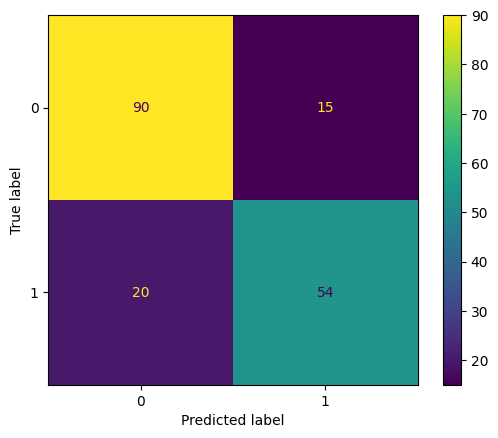

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=y_test_hats)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 